<h1>Date Analysis </h1>

In [1]:
#import important library used in EDA 

import numpy as np 

import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows =None

import matplotlib.pyplot as plt 

%matplotlib inline
import seaborn as sns

sns.set_style()

In [2]:
data = pd.read_html("https://docs.google.com/spreadsheets/u/0/d/1RoGmwzUBpL-Kg16ps_sI64D4ZavLpTXyBQ1EyJiQaIE/htmlview" , \
                   header=1 , na_values=["?"])[0]
data.head()

,1,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,4,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,5,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,6,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
data.shape

(205, 27)

In [5]:
data.set_index("1" , inplace=True) 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
3,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
6,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 2 to 206
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
data.select_dtypes("object").head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
1,,,,,,,,,,
2,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
4,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
5,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
6,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [8]:
length_unique = data.select_dtypes("object").apply(lambda x: x.nunique())
length_unique

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          7
num-of-cylinders     7
fuel-system          8
dtype: int64

<h2>visualize unique columns </h2>

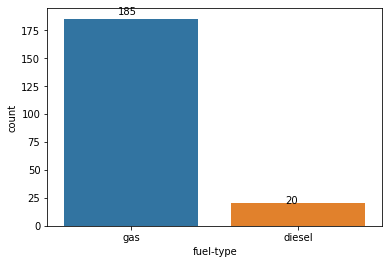

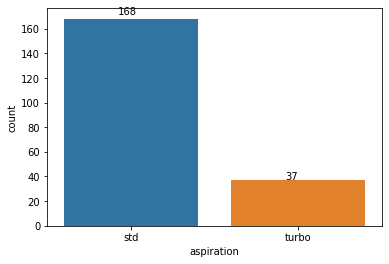

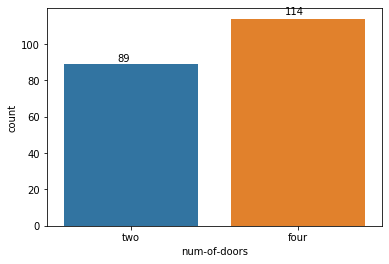

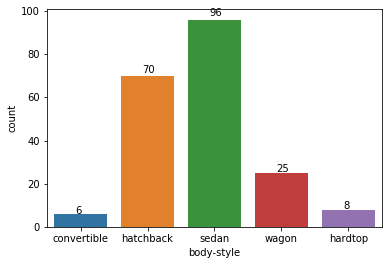

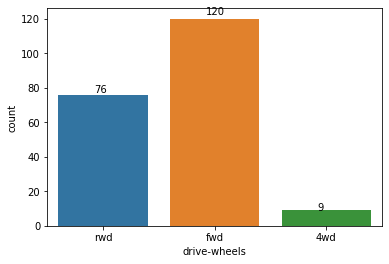

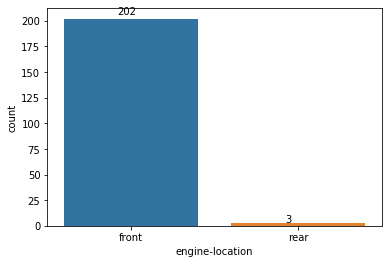

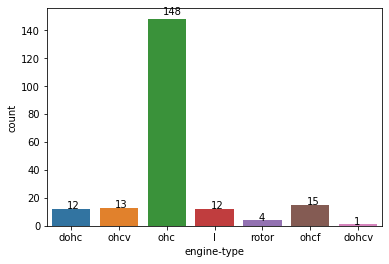

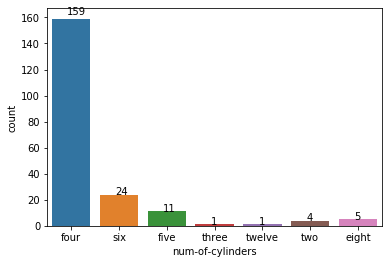

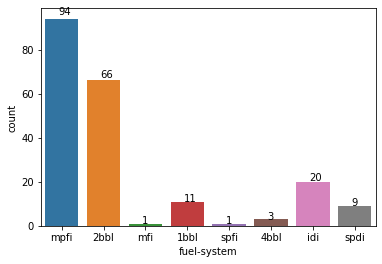

In [9]:

for  column in data.select_dtypes("object").columns.tolist():
    if data[column].nunique()<=8:
        g=sns.countplot(x = column , data = data)
        for p in g.patches:
            height , width = p.get_height() , p.get_width()
            x , y = p.get_xy()
            plt.annotate(f"{height:,}" , (x+0.4*width , y+1.02*height))
        plt.show()

In [11]:
data["num-of-doors"].fillna("four" , inplace =True)
assert data["num-of-doors"].isnull().sum()==0

<div id ="Q1">
    <h2> what most common property  in cars </h2>
    </div>

In [12]:
#let python to answer 
x=0
obj_data = data.select_dtypes("object").apply(lambda x:x.mode()).T
for i , j in zip(obj_data.index.tolist() , obj_data.values.tolist()):
    print(f"-most of cars are made by {j[0]} .\n" if x == 0 else f"-most of {i} in cars is {j[0]} .\n")
    print("_"*45)
    x+=1

-most of cars are made by toyota .

_____________________________________________
-most of fuel-type in cars is gas .

_____________________________________________
-most of aspiration in cars is std .

_____________________________________________
-most of num-of-doors in cars is four .

_____________________________________________
-most of body-style in cars is sedan .

_____________________________________________
-most of drive-wheels in cars is fwd .

_____________________________________________
-most of engine-location in cars is front .

_____________________________________________
-most of engine-type in cars is ohc .

_____________________________________________
-most of num-of-cylinders in cars is four .

_____________________________________________
-most of fuel-system in cars is mpfi .

_____________________________________________


<h5>anthor way to visualize most property of cars using <mark>word cloud</mark></h5> 

In [13]:
num_of_images =(data.nunique()<=8).sum()

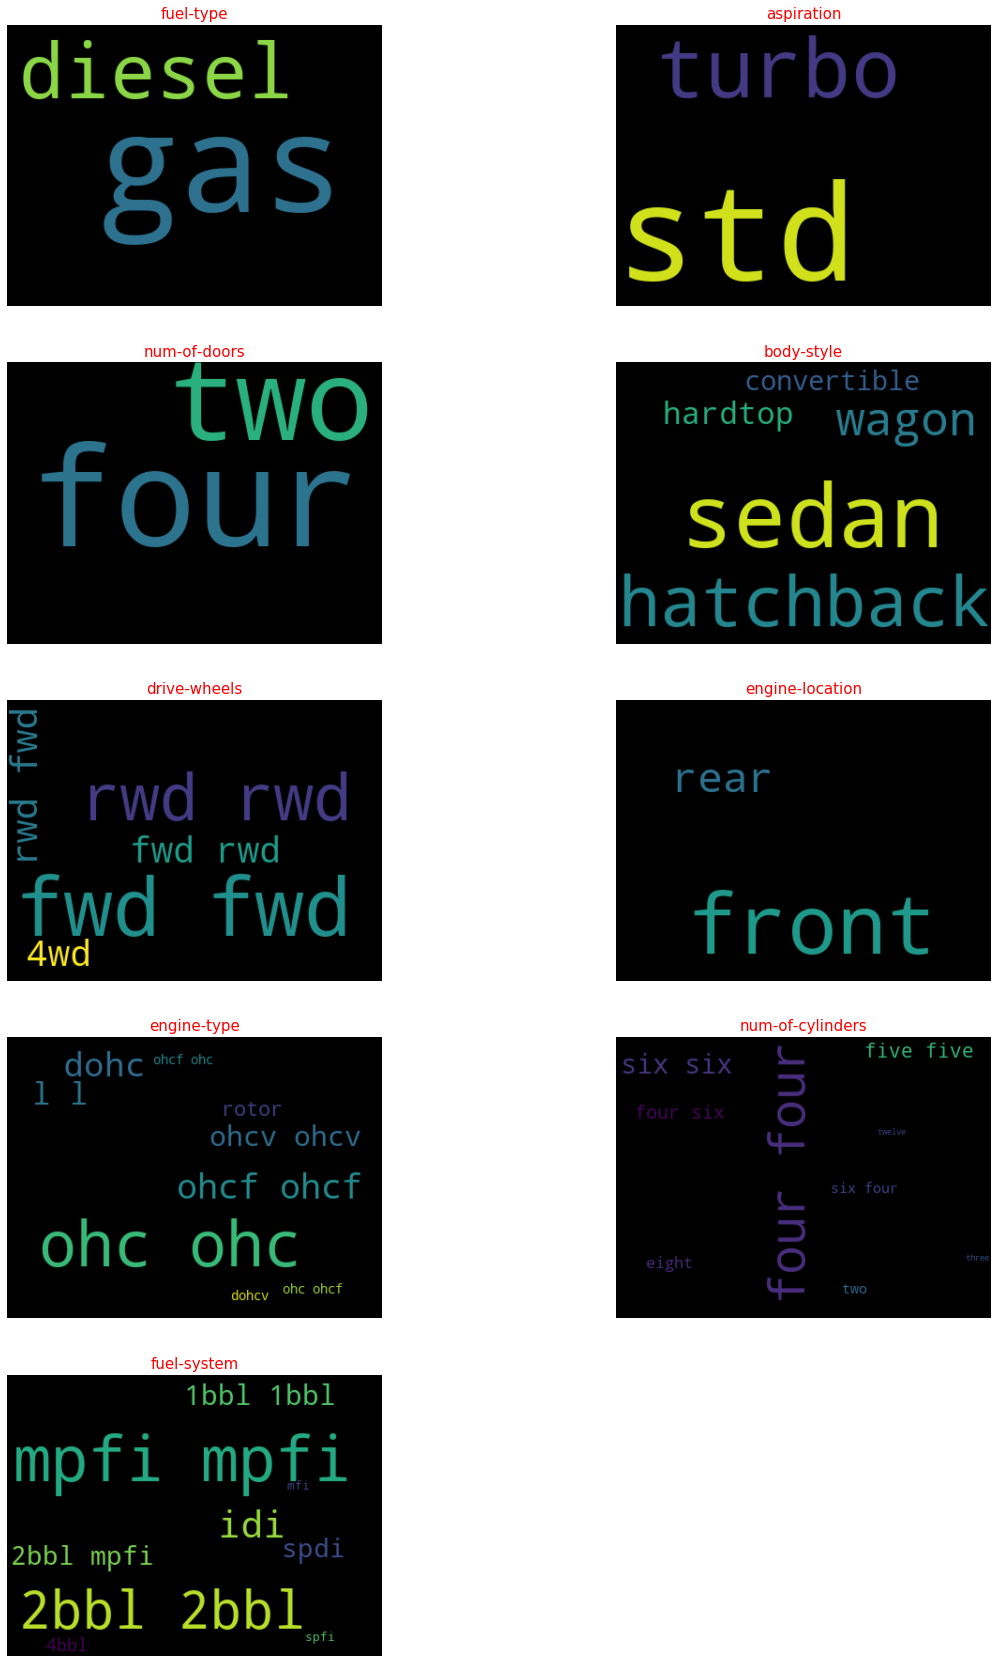

In [14]:
num_of_images =(data.nunique()<=8).sum()
x=0
from wordcloud import WordCloud
plt.figure(figsize=(20 , 30))
for column in data.select_dtypes("object").columns:
    words =None
    if data[column].nunique()<=8 :
        words=" ".join(data[column].values.tolist())
        wordcloud =WordCloud(height=300 , width=400  , margin =0).generate(words)
        plt.subplot(num_of_images//2 , 2  , x+1)
        x+=1
        plt.title(column , color ="r" , fontsize =15)
        plt.axis("off")
        plt.imshow(wordcloud , interpolation="bilinear")

<h2>Visualize output </h2>

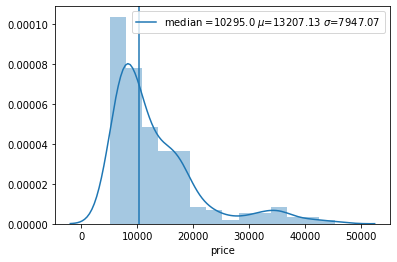

In [15]:
sns.distplot(data["price"].dropna() , hist=True)
plt.axvline(data["price"].median())
plt.legend(["median ={0} $\mu$={1:.2f} $\sigma$={2:.2f}".format(data["price"].median() ,data["price"].mean() , data["price"].std())])
plt.show()

<h5>there are a high skewnees in output </h5>

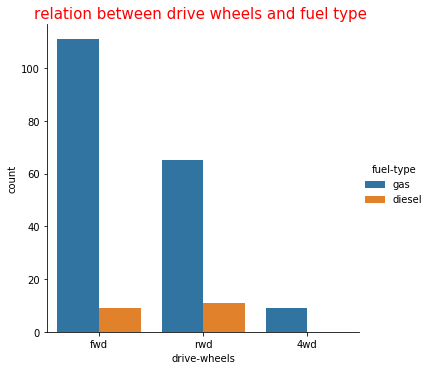

In [16]:
sns.catplot(x ="drive-wheels" , kind ="count" , hue ="fuel-type" , data = data , order=["fwd" , "rwd" , "4wd"])
plt.title("relation between drive wheels and fuel type " , color ="r" , fontsize =15)
plt.show()

In [17]:
data.groupby(["fuel-type" ,"drive-wheels"] )[["drive-wheels"]].count()

drive-wheels
fuel-type drive-wheels              
diesel    fwd                      9
          rwd                     11
gas       4wd                      9
          fwd                    111
          rwd                     65

<p> more powerful <mark>drive-wheels </mark> most of them depending on gas </p>

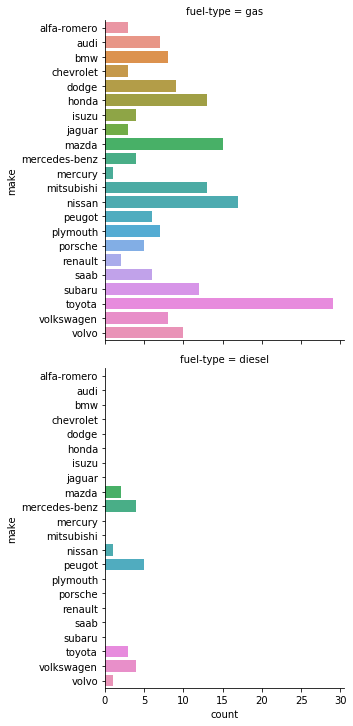

In [18]:
#what most kind of fuel that company produce 
sns.catplot(y ="make" , col="fuel-type" , data= data , kind ="count" , col_wrap=1  )

In [19]:
plot_data=(data.groupby(["make" , "fuel-type"] )["fuel-type"].count().to_frame()
 .rename(columns ={"fuel-type":"count"}).sort_values(by ="count" , ascending =False))

In [20]:
plot_data.head(10)

,,count
make,fuel-type,
toyota,gas,29
nissan,gas,17
mazda,gas,15
mitsubishi,gas,13
honda,gas,13
subaru,gas,12
volvo,gas,10
dodge,gas,9
volkswagen,gas,8


<Figure size 5760x7200 with 0 Axes>

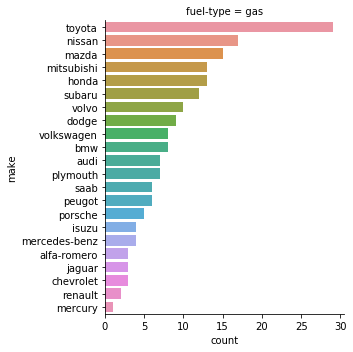

In [21]:
plt.figure(figsize=(80 , 100))
sns.catplot( y ="make" ,x = "count" , col="fuel-type" , data =plot_data.reset_index() , kind ="bar" , 
           col_wrap=1 , col_order=["gas"])
plt.show()

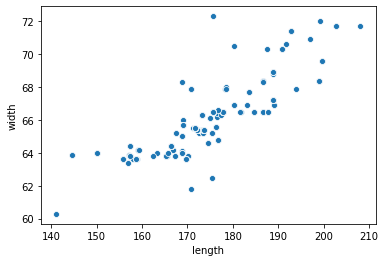

In [22]:
sns.scatterplot(x ="length" , y ="width" , data = data)
plt.show()

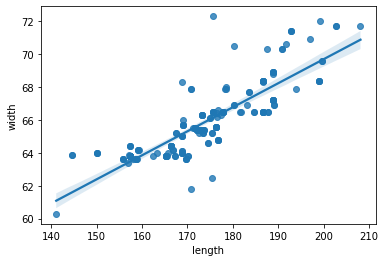

In [23]:
sns.regplot(x = "length" , y="width" , data = data )

In [24]:
data[["length"]].corrwith(data["width"])

length    0.841118
dtype: float64

<p> there are a postive correlation between length and width </P>

In [25]:
plot_data =(data[[ "num-of-cylinders" , "length" , "width" , "height"]]
            .set_index("num-of-cylinders")
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns ={"level_1":"dimension" , 0:"value"}))
plot_data.head()
            

,num-of-cylinders,dimension,value
0,four,length,168.8
1,four,width,64.1
2,four,height,48.8
3,four,length,168.8
4,four,width,64.1


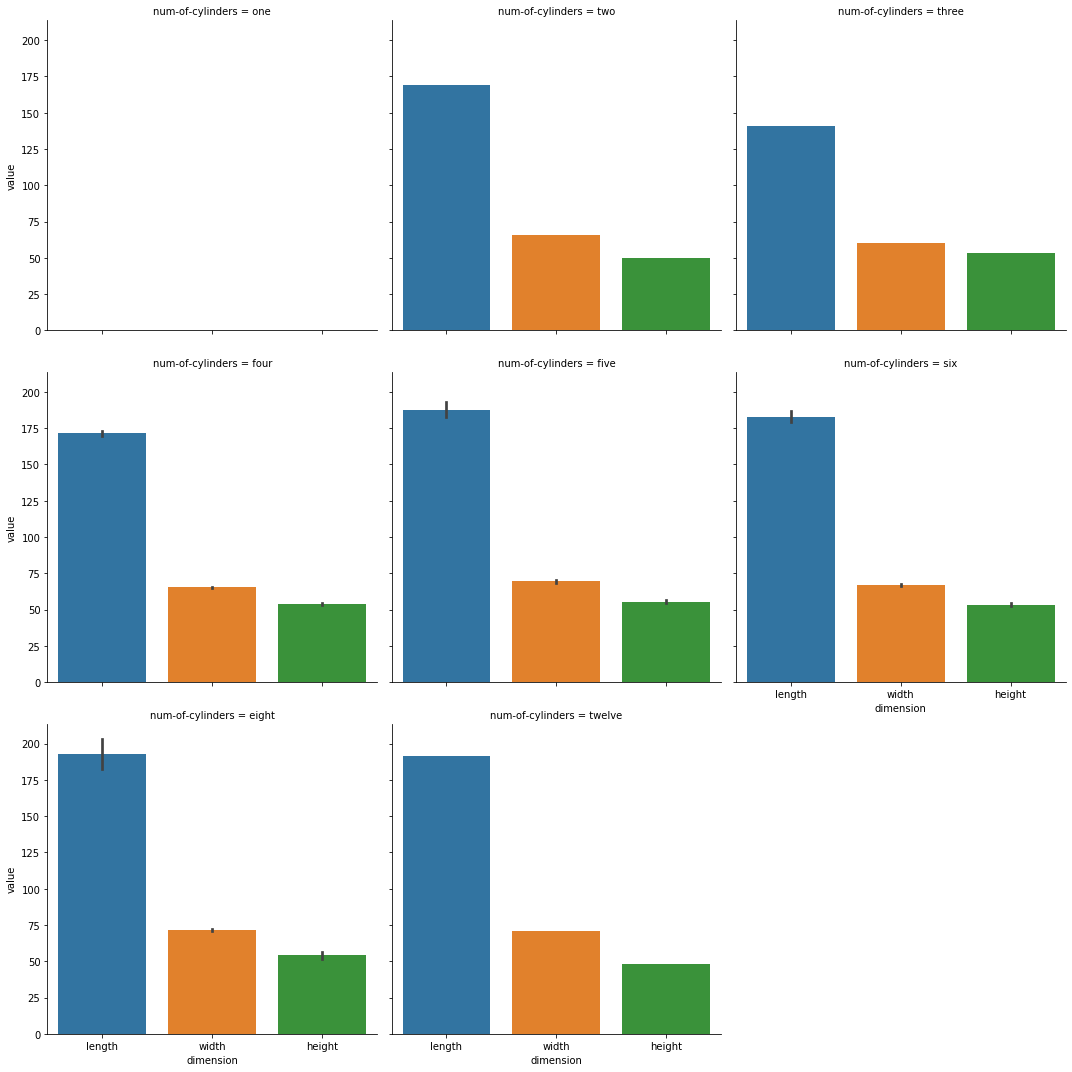

In [26]:
sns.catplot(x ="dimension" , y ="value" , col ="num-of-cylinders" ,kind ="bar" ,  data = plot_data , 
           col_wrap=3   , col_order=["one" , "two" , "three" , "four" , "five" , "six" , "eight" , "twelve"])
plt.show()

In [27]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
3,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
6,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


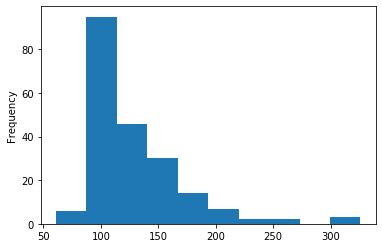

In [28]:
data["engine-size"].plot.hist()

<p>visualize distribution of numeric columns </p>

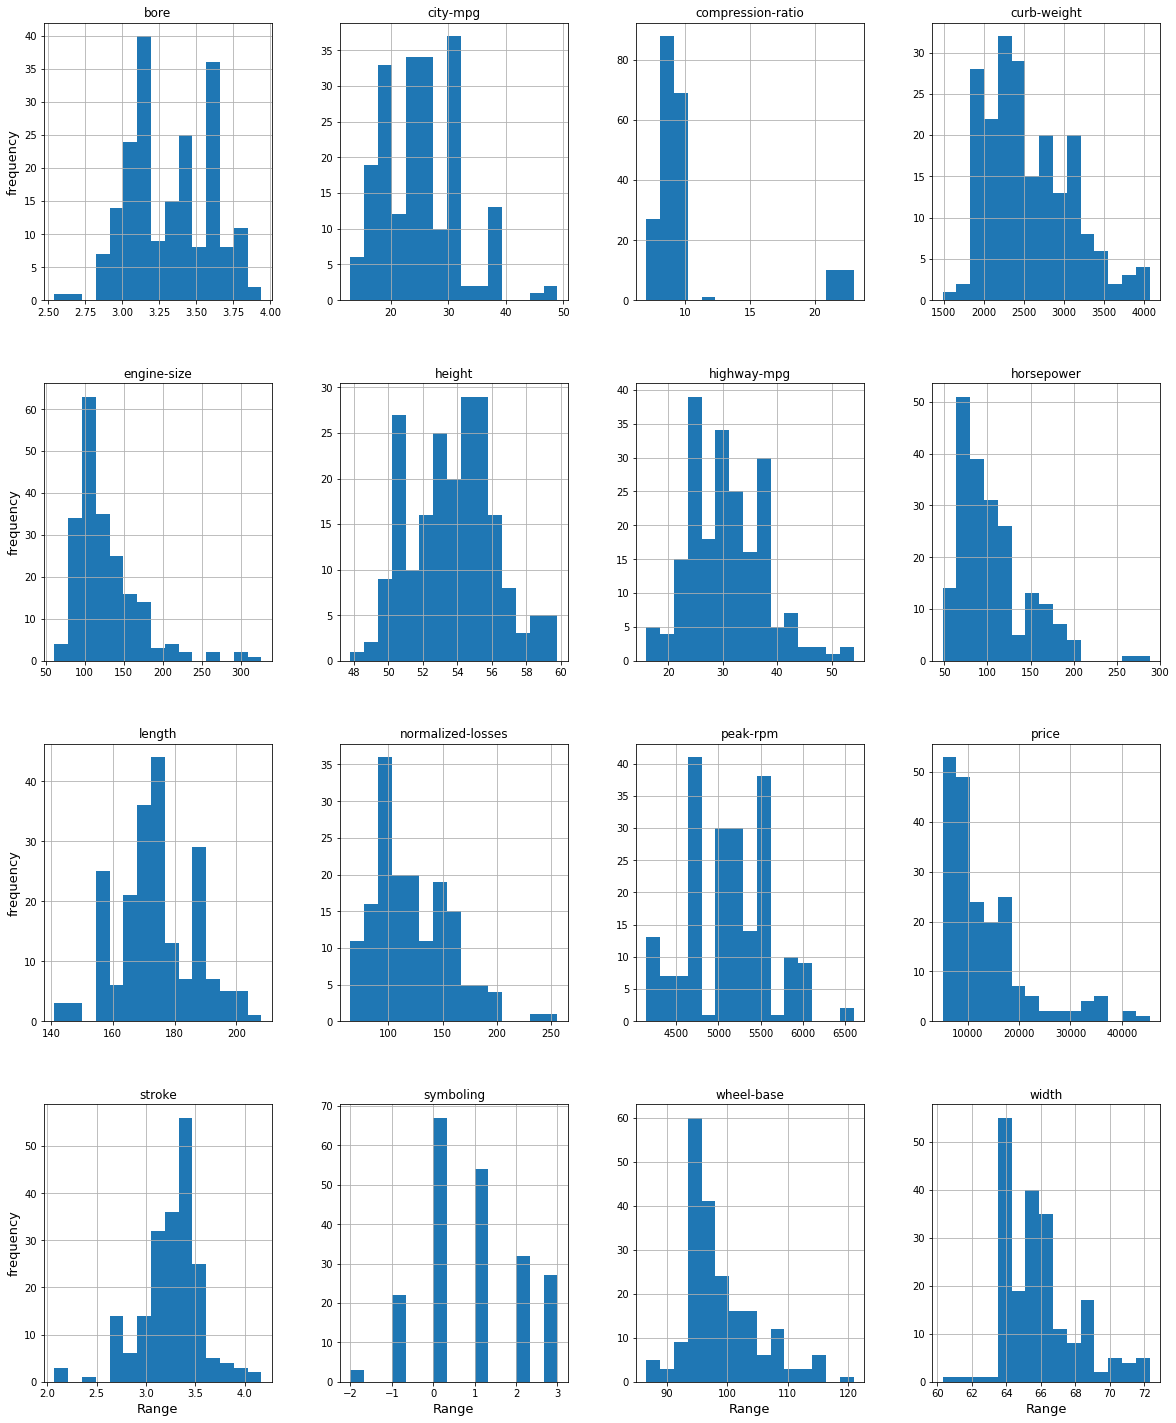

In [29]:
all_axes = data.select_dtypes("number").hist(bins =15  , figsize =(20 , 25))
for ax in all_axes.flatten():
    if ax.is_first_col():
        ax.set_ylabel("frequency" , fontsize =13)
    if ax.is_last_row():
        ax.set_xlabel("Range" , fontsize =13)
plt.show()

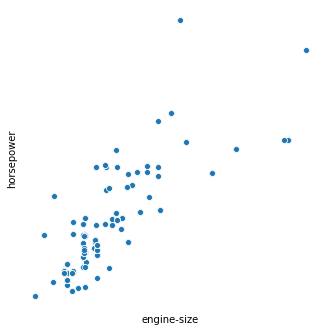

In [30]:
g =sns.relplot(x ="engine-size" , y ="horsepower" , data = data , kind ="scatter")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()

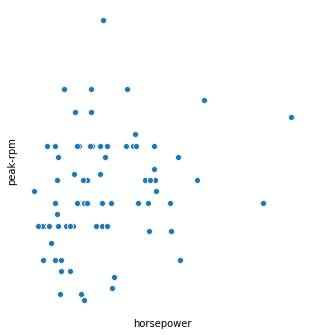

In [31]:
g =sns.relplot(x ="horsepower" , y ="peak-rpm" , data = data , kind ="scatter")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()

<p> both of them not there a strong relationship between them </p>

In [32]:
data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
3,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


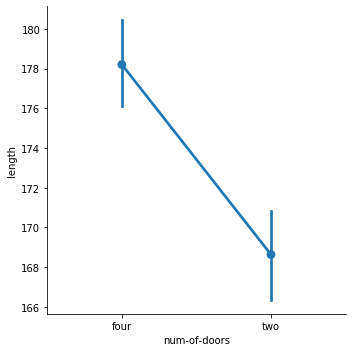

In [33]:
sns.catplot(x="num-of-doors" , y="length" , kind ="point" , data = data , 
           order =["four" , "two"])

<p> increase length lead to increse number of doors </p>

In [34]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
3,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
6,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [35]:
print("percentage of null " , (data["normalized-losses"].isnull().sum() /data.shape[0])*100 , "%")

percentage of null  20.0 %


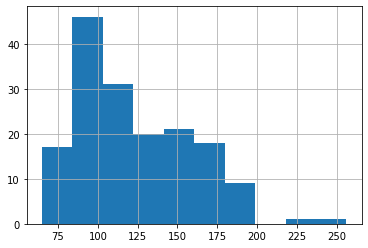

In [36]:
data["normalized-losses"].hist()

In [37]:
data["normalized-losses"].fillna(value = data["normalized-losses"].median() , inplace =True)

In [38]:
assert data["normalized-losses"].isnull().sum()==0

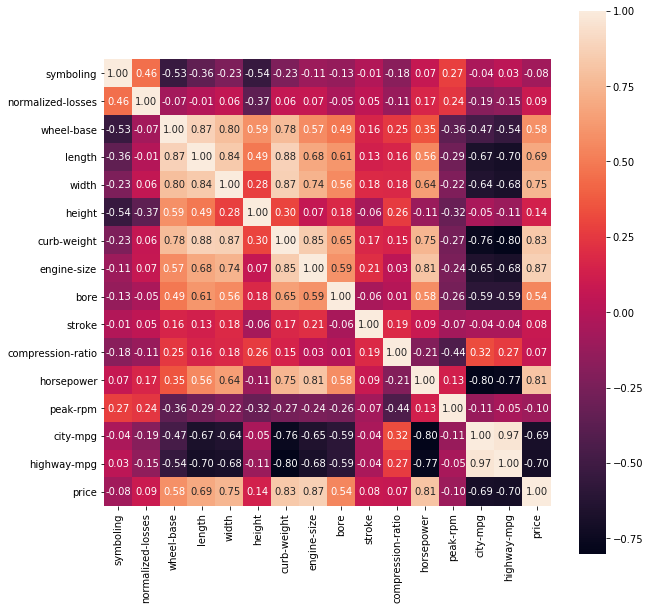

In [39]:
plt.figure(figsize=(10 ,10))
sns.heatmap(data.corr() , annot=True , square=True , fmt=".2f" )
plt.show()

<p>highway-mpg , city-mpg have a good negative correlation with price </p></br>
<p>engine-size , curb-weight , width , height , lenght and wheel-base have a good postive correlation with price </p>

<p> i didn't have any experience about cars so analysis isn't enough but i do what i can think </p>

In [40]:
for column in data.select_dtypes("object").columns.tolist():
    if data[column].nunique()<=22:
        for value , unique in zip(list(range(data[column].nunique())) , list(data[column].unique())):
            data[column].replace(unique , value , inplace =True)
        data[column] = data[column].astype("category")

In [41]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,115.0,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
3,3,115.0,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,1,115.0,0,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,164.0,1,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
6,2,164.0,1,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [42]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [43]:
from scipy.stats import mode
def plot_hist(col):
    data[col].hist(alpha =0.6)
    plt.axvline(data[col].median() , label="median" , color ="red")
    plt.axvline(data[col].mean() , label ="mean" , color ="green")
    plt.axvline(mode(data[col])[0] , label ="mode" , color ="yellow")
    plt.legend()
    plt.show()

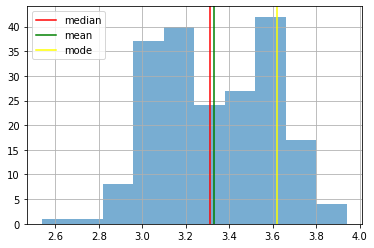

In [44]:
plot_hist("bore")

In [45]:
data["bore"].fillna(mode(data["bore"])[0][0] , inplace =True)
assert data["bore"].isnull().sum()==0

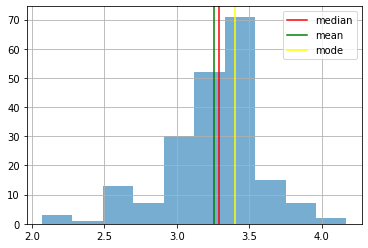

In [46]:
plot_hist("stroke")

In [47]:
data["stroke"].fillna(mode(data["stroke"])[0][0] , inplace =True)
assert data["stroke"].isnull().sum()==0

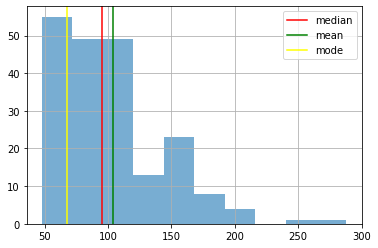

In [48]:
plot_hist("horsepower")

In [49]:
data["horsepower"].fillna(mode(data["horsepower"])[0][0] , inplace =True)
assert data["horsepower"].isnull().sum()==0

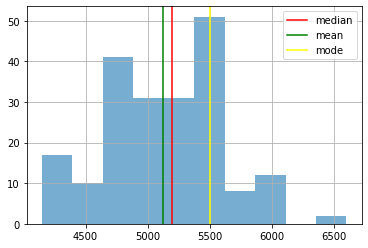

In [50]:
plot_hist("peak-rpm")

In [51]:
data["peak-rpm"].fillna(mode(data["peak-rpm"])[0][0] , inplace =True)
assert data["peak-rpm"].isnull().sum()==0

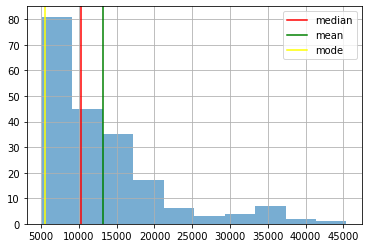

In [52]:
plot_hist("price")

In [53]:
data["price"].fillna(mode(data["price"])[0][0] , inplace =True)
assert data["price"].isnull().sum()==0

In [55]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,115.0,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
3,3,115.0,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,1,115.0,0,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,164.0,1,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
6,2,164.0,1,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data = pd.read_html("https://docs.google.com/spreadsheets/u/0/d/1RoGmwzUBpL-Kg16ps_sI64D4ZavLpTXyBQ1EyJiQaIE/htmlview" , \
                   header=1 , na_values=["?"])[0]
data.head()

,1,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,4,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,5,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,6,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
_ , unique =data["make"].factorize()

In [9]:
result =dict(zip(unique , range(len(unique))))

In [10]:
data["make"].apply(lambda x:result[x])

0       0
1       0
2       0
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      3
19      3
20      3
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
30      5
31      5
32      5
33      5
34      5
35      5
36      5
37      5
38      5
39      5
40      5
41      5
42      5
43      6
44      6
45      6
46      6
47      7
48      7
49      7
50      8
51      8
52      8
53      8
54      8
55      8
56      8
57      8
58      8
59      8
60      8
61      8
62      8
63      8
64      8
65      8
66      8
67      9
68      9
69      9
70      9
71      9
72      9
73      9
74      9
75     10
76     11
77     11
78     11
79     11
80     11
81     11
82     11
83     11
84     11
85     11
86     11
87     11
88     11
89     12
90     12
91     12
92     12
93     12
94     12
95     12
96     12
97     12
98     12
99     12


In [12]:
# make label encoding 
for col in data.select_dtypes("object"):
    data[col] = data[col].factorize()[0]

In [13]:
data.head()

,1,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,3,NaN,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,3,NaN,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,4,1,NaN,0,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,5,2,164.0,1,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,6,2,164.0,1,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [20]:
discreate_featues = data.dtypes==np.int64

In [22]:
discreate_featues

1                     True
symboling             True
normalized-losses    False
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight           True
engine-type           True
num-of-cylinders      True
engine-size           True
fuel-system           True
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg              True
highway-mpg           True
price                False
dtype: bool

In [29]:
data.isnull().sum()
data.fillna(0 , inplace=True)
data.isnull().sum()

1                    0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [38]:
X = data.drop("price" , axis =1)
y = data["price"]
discreate_featues=X.dtypes ==np.int64
discreate_featues.values

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True])

In [43]:
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X , y , discrete_features=discreate_featues)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

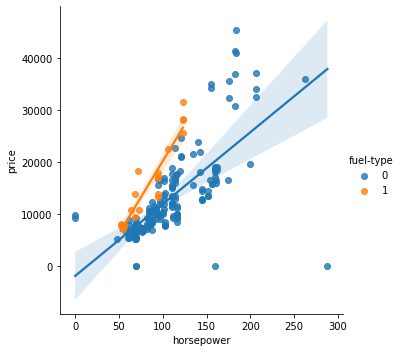

In [45]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=data);

In [46]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=data.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

KeyError: "The following 'value_vars' are not present in the DataFrame: ['MoSold', 'ScreenPorch', 'YearBuilt']"

In [50]:
re =data.melt(id_vars="price", value_vars=["horsepower"])

In [51]:
re.head()

,price,variable,value
0,13495.0,horsepower,111.0
1,16500.0,horsepower,111.0
2,16500.0,horsepower,154.0
3,13950.0,horsepower,102.0
4,17450.0,horsepower,115.0


In [54]:
re.sort_values(by ="value" , ascending=True)

,price,variable,value
131,9895.0,horsepower,0.0
130,9295.0,horsepower,0.0
18,5151.0,horsepower,48.0
182,7775.0,horsepower,52.0
184,7995.0,horsepower,52.0
90,7099.0,horsepower,55.0
159,7788.0,horsepower,56.0
158,7898.0,horsepower,56.0
30,6479.0,horsepower,58.0
32,5399.0,horsepower,60.0
